In [90]:
from useful_scit.imps import *
import wrf 
from netCDF4 import Dataset
from sklearn.cluster import KMeans

In [91]:
path = '/Volumes/mbProD/Downloads/wrf_out_sample/wrfout_d04*'

In [92]:
files = glob.glob(path)
files.sort()
ncs = [Dataset(f) for f in files]

In [93]:
tc = wrf.getvar(ncs,'tc',timeidx=wrf.ALL_TIMES, method="cat")

In [94]:
z = wrf.getvar(ncs,'z',timeidx=wrf.ALL_TIMES, method="cat")

In [95]:
tc['height']=z

In [100]:
tc_t = tc1 = tc.to_series()
tc1 = tc1.unstack(level='Time')

In [102]:
tc

<xarray.DataArray 'temp' (Time: 4, bottom_top: 49, south_north: 150, west_east: 153)>
array([[[[ 10.626526, ...,   3.558044],
         ...,
         [  7.74411 , ...,  25.969208]],

        ...,

        [[-68.81813 , ..., -70.88298 ],
         ...,
         [-70.01167 , ..., -71.67766 ]]],


       ...,


       [[[ 10.400543, ...,   3.794403],
         ...,
         [  8.282043, ...,  25.995697]],

        ...,

        [[-69.141266, ..., -70.50749 ],
         ...,
         [-70.02533 , ..., -71.36795 ]]]], dtype=float32)
Coordinates:
    XLONG     (south_north, west_east) float32 -68.95856 -68.94759 ... -67.29216
    XLAT      (south_north, west_east) float32 -17.15197 -17.15197 ... -15.58474
    XTIME     (Time) float64 1.89e+04 1.892e+04 1.893e+04 1.894e+04
  * Time      (Time) datetime64[ns] 2017-12-15T03:00:00 ... 2017-12-15T03:45:00
    datetime  (Time) datetime64[ns] 2017-12-15T03:00:00 ... 2017-12-15T03:45:00
    height    (Time, bottom_top, south_north, west_east) float32 38

In [8]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(tc1)

In [9]:
tc1['lab']=kmeans.labels_

In [10]:
lab_da = tc1['lab'].to_xarray()

In [83]:
labs = tc1['lab'].unique()
labs.sort()
labs
i = labs[5]

In [84]:
labs

array([0, 1, 2, 3, 4, 5])

In [85]:
ti = tc.where(lab_da==i)

In [86]:
ts = tc.to_dataset()

In [87]:
ts['b_t']=ts.bottom_top

In [88]:
tic=ti.count(dim=['Time','south_north','west_east'])

In [89]:
(ts.b_t * tic).sum()/tic.sum()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    temp     float64 12.41

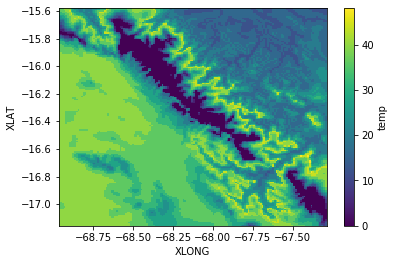

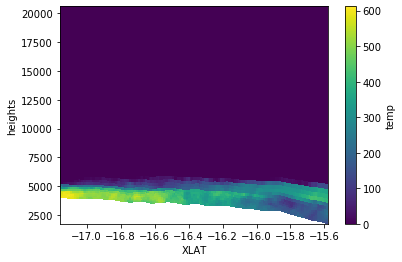

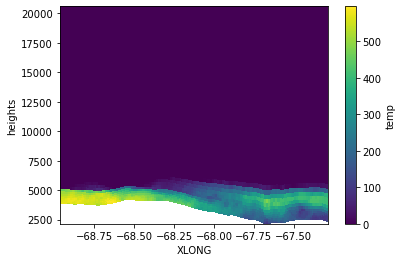

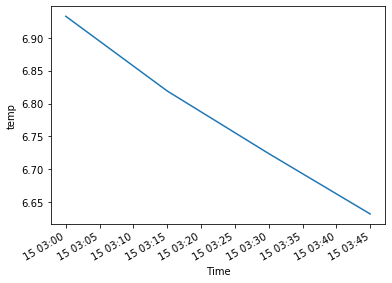

In [17]:
plt.subplots()
ti.count(dim=['Time','bottom_top']).plot(x='XLONG',y='XLAT')
plt.subplots()
tii = ti.count(dim=['Time','west_east'])
tii = tii.assign_coords(heights=ti.height.mean(dim=['Time','west_east']))
tii = tii.assign_coords(XLAT=ti.XLAT.mean(dim=['west_east']))
tii.plot(x='XLAT',y='heights')
plt.subplots()
dimx = 'south_north'
tii = ti.count(dim=['Time',dimx])
tii = tii.assign_coords(heights=ti.height.mean(dim=['Time',dimx]))
tii = tii.assign_coords(XLONG=ti.XLONG.mean(dim=[dimx]))
tii.plot(x='XLONG',y='heights')
plt.subplots()
ti.median(dim=['bottom_top','south_north','west_east']).plot()

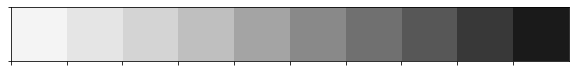

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [18]:
sns.choose_colorbrewer_palette('s')

In [19]:
tii

<xarray.DataArray 'temp' (bottom_top: 49, west_east: 153)>
array([[576, 576, 576, ..., 104, 108, 140],
       [576, 572, 572, ...,  96,  96, 124],
       [568, 568, 572, ...,  96,  88, 112],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])
Coordinates:
  * bottom_top  (bottom_top) int64 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48
  * west_east   (west_east) int64 0 1 2 3 4 5 6 ... 146 147 148 149 150 151 152
    heights     (bottom_top, west_east) float32 3932.0017 3932.945 ... 20360.766
    XLONG       (west_east) float32 -68.95861 -68.94757 ... -67.30311 -67.29207

In [20]:
ti.count(dim=['Time','west_east'])

<xarray.DataArray 'temp' (bottom_top: 49, south_north: 150)>
array([[612, 612, 612, ..., 160, 148, 136],
       [604, 604, 600, ..., 164, 148, 140],
       [600, 600, 600, ..., 168, 164, 144],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])
Coordinates:
  * bottom_top   (bottom_top) int64 0 1 2 3 4 5 6 7 ... 41 42 43 44 45 46 47 48
  * south_north  (south_north) int64 0 1 2 3 4 5 6 ... 144 145 146 147 148 149

In [21]:
ti.height.mean(dim=['Time','west_east'])

<xarray.DataArray 'height' (bottom_top: 49, south_north: 150)>
array([[ 4039.3726,  4032.9175,  4024.1013, ...,  1897.5559,  1850.9321,
         1799.6497],
       [ 4092.3525,  4085.9119,  4077.1208, ...,  1954.5134,  1907.9873,
         1856.8097],
       [ 4158.4136,  4151.993 ,  4143.2407, ...,  2026.484 ,  1980.1011,
         1929.0778],
       ...,
       [19506.846 , 19506.812 , 19506.764 , ..., 19498.732 , 19498.664 ,
        19498.592 ],
       [19938.027 , 19937.984 , 19937.922 , ..., 19929.744 , 19929.66  ,
        19929.568 ],
       [20373.297 , 20373.244 , 20373.166 , ..., 20364.035 , 20363.957 ,
        20363.86  ]], dtype=float32)
Coordinates:
  * bottom_top   (bottom_top) int64 0 1 2 3 4 5 6 7 ... 41 42 43 44 45 46 47 48
  * south_north  (south_north) int64 0 1 2 3 4 5 6 ... 144 145 146 147 148 149

In [ ]:
r,c = tc1.shape

In [ ]:
print(r,c)

In [9]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

In [10]:
rnc = rpackages.importr('NbClust')

In [19]:
ii=10000
m = robjects.r.matrix(
    robjects.FloatVector(tc1[:ii*c].values.flatten()),
    nrow=ii*c
)

In [ ]:
res = rnc.NbClust(m,distance = "euclidean",
         method ='kmeans',**{'min.nc':2,'max.nc':3},
           index="silhouette")

In [1]:
res

NameError: name 'res' is not defined

In [2]:
a

2

In [3]:
print(res)

NameError: name 'res' is not defined